In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np

df = pd.read_csv("credit_card_approval.csv")

all_feature_names = df.columns.tolist()
all_discrete_feature_names = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','JOB','STATUS']

df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,M,Y,N,1 children,166500.0,Secondary / secondary special,Married,With parents,-12372,-5401,1,0,1,0,Core staff,-8,0,0
537663,5010773,F,N,Y,No children,135000.0,Higher education,Married,With parents,-14160,-4635,1,0,0,0,Sales staff,-8,0,0
537664,5105601,M,N,Y,No children,180000.0,Higher education,Married,House / apartment,-24204,-2462,1,0,0,0,Private service staff,-7,0,0
537665,5132833,M,Y,N,No children,220500.0,Secondary / secondary special,Married,House / apartment,-22647,-3847,1,0,1,0,Laborers,-1,0,0


## analysis

In [3]:
# # features 1
# # get min, max, mean, std, bin-fingure,
# min = df['ID'].min()
# max = df['ID'].max()
# first_column_mean = df['ID'].mean()
# first_column_std = df['ID'].std()
# print(min, max, first_column_mean, first_column_std)


def plot_discrete_feature(featureName):
    # type_count = df[featureName].nunique()    
    unique_value_set = df[featureName].unique()
    counts_for_each_value_risk = []
    counts_for_each_value_no_risk = []

    for uniq_val in unique_value_set:
        risk_count = len(df[(df[featureName] == uniq_val) & (df['TARGET'] == 1)])
        no_risk_count = len(df[(df[featureName] == uniq_val) & (df['TARGET'] == 0)])

        counts_for_each_value_risk.append(risk_count)
        counts_for_each_value_no_risk.append(no_risk_count)
        
    plt.figure(figsize = (10,7.5))
    plt.bar(unique_value_set, counts_for_each_value_risk, bottom=0, width=0.5, label = 'Risk Users')
    plt.bar(unique_value_set, counts_for_each_value_no_risk, bottom=counts_for_each_value_risk, width=0.5, label = 'Non-risk Users')
    plt.xticks(unique_value_set, rotation=-45, ha='left')
    for xi,ai,bi in zip(unique_value_set, counts_for_each_value_no_risk, counts_for_each_value_risk):
        if ai+bi > 0:
            percentatge = 1000*bi/(ai+bi)

        else:
            continue
        plt.text(xi, ai+bi ,f'{percentatge:.1f}‰',ha='center',va='bottom')
    plt.yscale('log')
    plt.legend()
    plt.title(featureName)
    plt.tight_layout()
    plt.savefig(featureName+'.pdf', format='pdf')


# for feature_name in all_discrete_feature_names:
#     plot_discrete_feature(feature_name)


In [4]:

# drop useless features
drop_feature_names = ['ID','FLAG_MOBIL', 'BEGIN_MONTHS', 'STATUS']
for drop_feature in drop_feature_names:
    df = df.drop(drop_feature, axis=1)

valid_all_feature_names = df.columns.tolist()
valid_discrete_feature_names = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','JOB']
# -- now we only use valid features --

# discrete features no size
one_hot_encode_features = copy.deepcopy(valid_discrete_feature_names)
one_hot_encode_features.remove('CNT_CHILDREN')


# discrete features with size
discrete_features_with_size = ['CNT_CHILDREN']
# continuous features
valid_continuous_feature_names = [item for item in valid_all_feature_names if item not in valid_discrete_feature_names]

# map continuous features to [0,1]
def map_continuous_feature(feature_name):
    min = df[feature_name].min()
    max = df[feature_name].max()
    df[feature_name] = (df[feature_name] - min) / (max - min)

for feature in valid_continuous_feature_names:
    map_continuous_feature(feature)

# deal with discrete features with size
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].replace('No children', 0)
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].replace('1 children', 0.5)
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].replace('2+ children', 1)

# one-hot encode for discrete features no size
need_to_encode_features = copy.deepcopy(one_hot_encode_features)
#   already 1/0 no need to encode anymore
need_to_encode_features.remove('FLAG_EMAIL')
need_to_encode_features.remove('FLAG_PHONE')
need_to_encode_features.remove('FLAG_WORK_PHONE')
#   turn Y/N into 1/0  and  no need to encode anymore
def turnYNto10(feature_name):
    df[feature_name] = df[feature_name].replace('Y', 1)
    df[feature_name] = df[feature_name].replace('N', 0)
    need_to_encode_features.remove(feature_name)

turnYNto10('FLAG_OWN_REALTY')
turnYNto10('FLAG_OWN_CAR')

for feature in need_to_encode_features:
    df = pd.get_dummies(df, columns=[feature], prefix=[feature])

df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,TARGET,...,JOB_Laborers,JOB_Low-skill Laborers,JOB_Managers,JOB_Medicine staff,JOB_Private service staff,JOB_Realty agents,JOB_Sales staff,JOB_Secretaries,JOB_Security staff,JOB_Waiters/barmen staff
0,1,0,1.0,0.156977,0.663065,0.854549,0,0,0,0.0,...,False,False,True,False,False,False,False,False,False,False
1,0,0,0.0,0.034884,0.393354,0.977064,1,1,0,0.0,...,False,False,False,False,True,False,False,False,False,False
2,1,1,0.0,0.156977,0.293891,0.935589,0,1,0,0.0,...,True,False,False,False,False,False,False,False,False,False
3,1,1,0.5,0.055233,0.554959,0.876465,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1.0,0.072674,0.428104,0.645706,1,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,1,0,0.5,0.090116,0.714811,0.656983,0,1,0,0.0,...,False,False,False,False,False,False,False,False,False,False
537663,0,1,0.0,0.069767,0.610384,0.705785,0,0,0,0.0,...,False,False,False,False,False,False,True,False,False,False
537664,0,1,0.0,0.098837,0.023771,0.844228,0,0,0,0.0,...,False,False,False,False,True,False,False,False,False,False
537665,1,0,0.0,0.125000,0.114706,0.755989,0,1,0,0.0,...,True,False,False,False,False,False,False,False,False,False


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


# split train and test
test_set = df.sample(frac=0.2)
train_set = df.drop(test_set.index)

X_train = train_set.drop('TARGET', axis=1)  # Features
y_train = train_set['TARGET']  # Target variable

X_test = test_set.drop('TARGET', axis=1)  # Features
y_test = test_set['TARGET']  # Target variable

confusion_matrix_list = []
accuracy_no_risk_list = []
accuracy_risk_list = []

for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict the class labels for the test set
    y_pred = knn.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy_no_risk = cm[0][0] / (cm[0][0]+cm[0][1])
    accuracy_risk = cm[1][1] / (cm[1][0]+cm[1][1])

    confusion_matrix_list.append(cm)
    accuracy_no_risk_list.append(accuracy_no_risk * 100)
    accuracy_risk_list.append(accuracy_risk * 100)




KeyboardInterrupt: 

11
12
13
14
15
16
17
18
19
20


ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

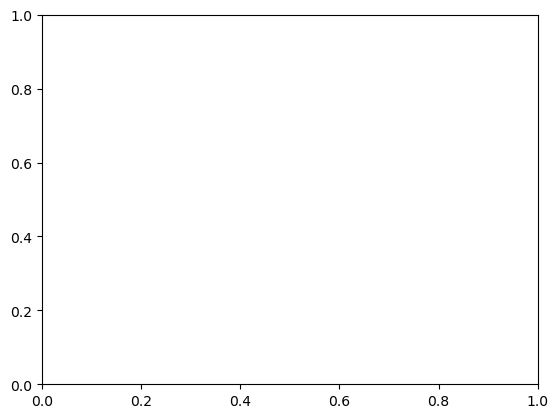

In [ ]:
for k in range(11,21):
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict the class labels for the test set
    y_pred = knn.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy_no_risk = cm[0][0] / (cm[0][0]+cm[1][0])
    accuracy_risk = cm[1][1] / (cm[1][1]+cm[0][1])

    confusion_matrix_list.append(cm)
    accuracy_no_risk_list.append(accuracy_no_risk * 100)
    accuracy_risk_list.append(accuracy_risk * 100)




In [ ]:
# draw figure along with k
k_values_list = [k for k in range(1,21)]
plt.plot(k_values_list, accuracy_no_risk_list, marker='o',markersize=5)
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Curve of Non-risk Users')
plt.tight_layout()
plt.grid(alpha=0.2)
plt.savefig('Accuracy-Non-risk.pdf', format='pdf')
# plt.show()
plt.clf()

plt.plot(k_values_list, accuracy_risk_list, marker='o',markersize=5)
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Curve of Risk Users')
plt.tight_layout()
plt.grid(alpha=0.2)
plt.savefig('Accuracy-Risk.pdf', format='pdf')
# plt.show()
plt.clf()
# aa = [np.array([[106858,    255],
#        [   306,    114]]), np.array([[107072,     41],
#        [   351,     69]]), np.array([[106999,    114],
#        [   316,    104]]), np.array([[107088,     25],
#        [   346,     74]]), np.array([[107070,     43],
#        [   342,     78]]), np.array([[107091,     22],
#        [   348,     72]]), np.array([[107090,     23],
#        [   348,     72]]), np.array([[107092,     21],
#        [   352,     68]]), np.array([[107072,     41],
#        [   339,     81]]), np.array([[107093,     20],
#        [   352,     68]])]

NameError: name 'plt' is not defined